### Predictive Power Score (PPS)

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


/Users/tddagdas/opt/anaconda3/envs/Main/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data.csv')

df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
df = df.rename(columns = {'Unnamed: 0':'first_column'})
df.head()

,first_column,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
# Number of rows and columns of data
num_rows, num_columns = df.shape
print('#columns: ', num_columns)
print('#rows: ', num_rows)

#columns:  180
#rows:  11500


In [5]:
df.columns

Index(['first_column', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)

In [6]:
df1 = df[["X5", "X10", "X15", "X38","X46", "X48","X51", "X57","X58", "X60", "X62", "X63","X69", "X70","X74", "y"]]

df1.columns

Index(['X5', 'X10', 'X15', 'X38', 'X46', 'X48', 'X51', 'X57', 'X58', 'X60',
       'X62', 'X63', 'X69', 'X70', 'X74', 'y'],
      dtype='object')

In [7]:
# select 15 columns who have equal and above 130 rank

X = df1[["X5", "X10", "X15", "X38","X46", "X48","X51", "X57","X58", "X60", "X62", "X63","X69", "X70","X74"]]
print(X)

        X5  X10  X15  X38  X46  X48  X51  X57  X58  X60  X62  X63  X69  X70  \
0      192  -38  152 -115   13  -58   47   41  -13  -61  -77  -66   88   12   
1      320  232 -267  324  295  286  301  169  111 -388 -892 -949 -668 -432   
2      -32  -94 -103   33  -68  -98  -57   11   19  -20  -71  -71   27   25   
3      -89  -79  -83  -67  -70  -82  -70  -89  -87  -70  -37  -31  -67  -69   
4      -78  -59   -9  -36  -45  -45  -45    0  -28  -37    5   30    2   13   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
11495  -36  -49  -76  -53  -33  -33  -27  -17  -23  -24  -14  -10   38   44   
11496  141  136 -180   91 -155 -176 -171   95  108  128  120  113   88   45   
11497   10   14   77   17   23   32  -23   30   33  -18   -6    5   47   74   
11498   -2   29  -37  -42  -80  -98 -106   -1    8   21   25   28  -18  -40   
11499   74   23   -9  -23  -17    6   22  -62  -69  -75  -87  -76  -19  -27   

       X74  
0     -186  
1      326  
2      -47  

In [8]:
y=df1[['y']]
print(y)

       y
0      4
1      1
2      5
3      5
4      5
...   ..
11495  2
11496  1
11497  5
11498  3
11499  4

[11500 rows x 1 columns]


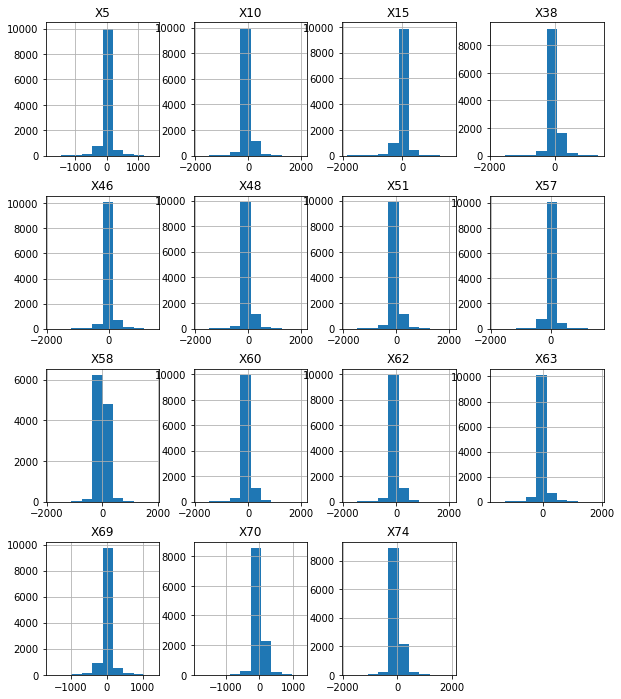

In [9]:
# look at the subset data's histogram

X.hist(figsize = (10, 12));

In [10]:
pip install ppscore


Note: you may need to restart the kernel to use updated packages.


In [11]:
import ppscore as pps
#pps.score(df1, "X5", "X10", "X15", "X38","X46", "X48","X51", "X57","X58", "X60", "X62", "X63","X69", "X70","X74", "y")


In [12]:
pps.matrix(df1)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,X5,X5,1.0,predict_itself,True,None,0.0000,1.000000,None
1,X5,X10,0.0,regression,True,mean absolute error,87.0980,94.679094,DecisionTreeRegressor()
2,X5,X15,0.0,regression,True,mean absolute error,88.4478,104.620804,DecisionTreeRegressor()
3,X5,X38,0.0,regression,True,mean absolute error,87.1596,106.525832,DecisionTreeRegressor()
4,X5,X46,0.0,regression,True,mean absolute error,88.0980,108.190428,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
251,y,X63,0.0,regression,True,mean absolute error,85.5354,85.608517,DecisionTreeRegressor()
252,y,X69,0.0,regression,True,mean absolute error,86.4358,86.533502,DecisionTreeRegressor()
253,y,X70,0.0,regression,True,mean absolute error,86.7386,86.805475,DecisionTreeRegressor()
254,y,X74,0.0,regression,True,mean absolute error,86.4428,86.555022,DecisionTreeRegressor()


In [13]:
print(pps.matrix)

<function matrix at 0x7fa7dc0a1cb0>


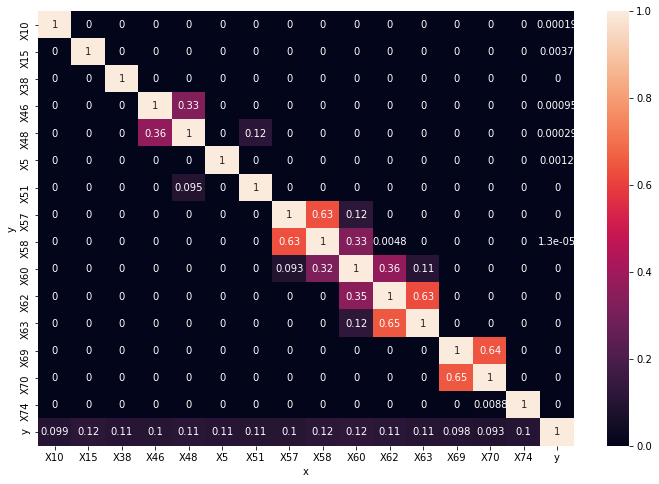

In [14]:
import seaborn as sns

from matplotlib.pyplot import figure

figure(figsize=(12,8))



matrix_df = pps.matrix(df1).pivot(columns='x', index='y',  values='ppscore')

sns.heatmap(matrix_df, annot=True)


In [18]:
#figure(figsize=(20,20))



#matrix_df = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore')

#sns.heatmap(matrix_df, annot=True)

In [16]:
df_1 = df.iloc[:, 1:30]

df_1['y'] = df['y']

print(df_1)

df_1.head()

        X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X21  X22  X23  \
0      135  190  229  223  192  125   55   -9  -33  -38  ... -138 -125 -101   
1      386  382  356  331  320  315  307  272  244  232  ... -967 -746 -464   
2      -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...  -37  -14  -10   
3     -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...  -64  -79  -84   
4       -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...  -75  -29   14   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
11495  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  ...  -45  -34  -33   
11496  -47  -11   28   77  141  211  246  240  193  136  ... -168 -144 -117   
11497   14    6  -13  -16   10   26   27   -9    4   14  ...   26   35   81   
11498  -40  -25   -9  -12   -2   12    7   19   22   29  ... -140 -157 -157   
11499   29   41   57   72   74   62   54   43   31   23  ...   69   50   33   

       X24  X25  X26  X27  X28  X29  y  
0      -50

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-138,-125,-101,-50,11,39,24,48,64,4
1,386,382,356,331,320,315,307,272,244,232,...,-967,-746,-464,-152,118,318,427,473,485,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,-37,-14,-10,-39,-78,-102,-98,-80,-54,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-64,-79,-84,-97,-94,-84,-77,-75,-72,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,-75,-29,14,55,78,73,28,-13,-43,5


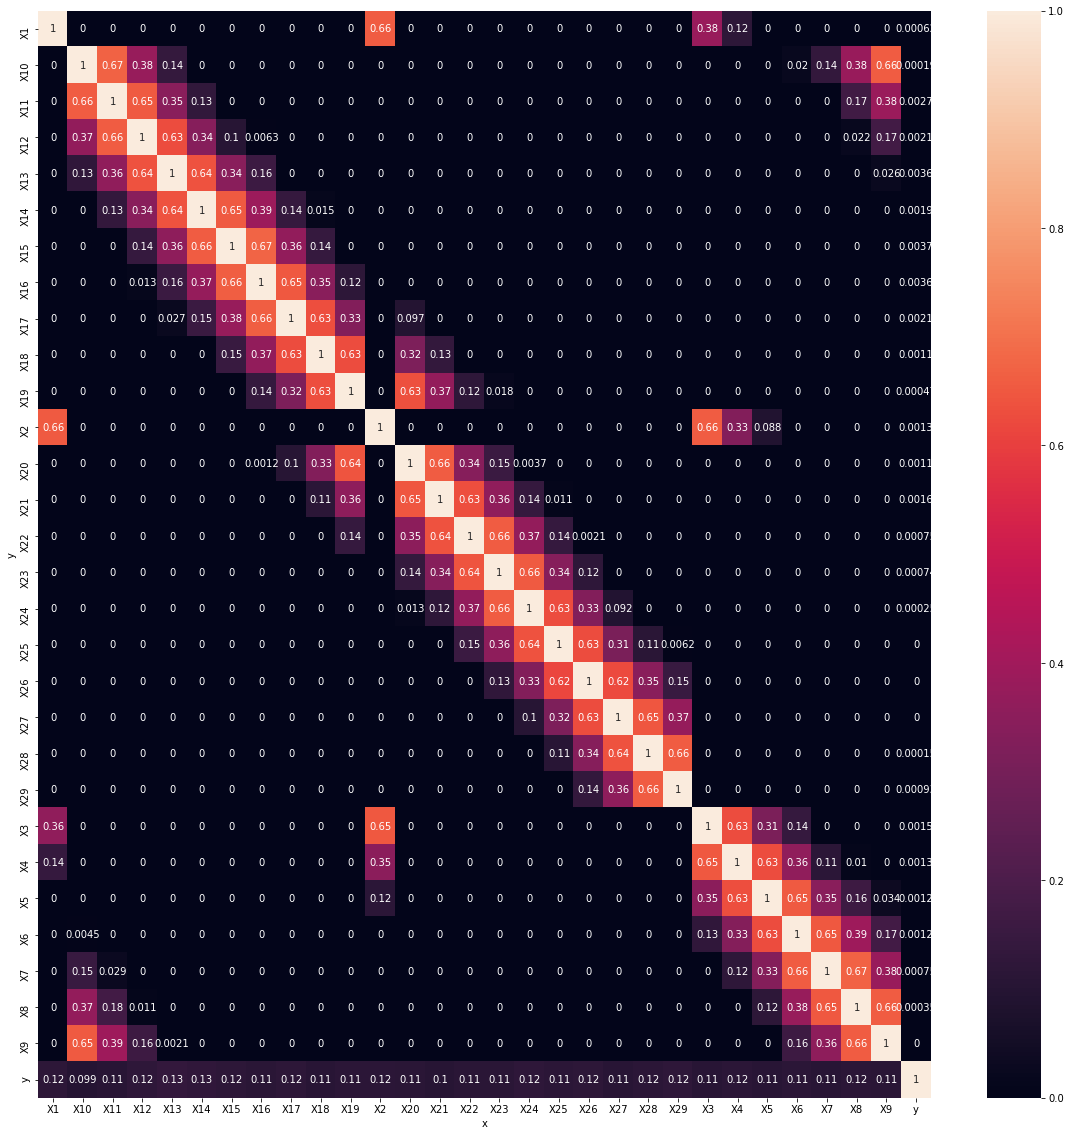

In [17]:
figure(figsize=(20,20))



matrix_df = pps.matrix(df_1).pivot(columns='x', index='y',  values='ppscore')

sns.heatmap(matrix_df, annot=True)

In [19]:
df_2 = df.iloc[:, 30:60]

df_2['y'] = df['y']



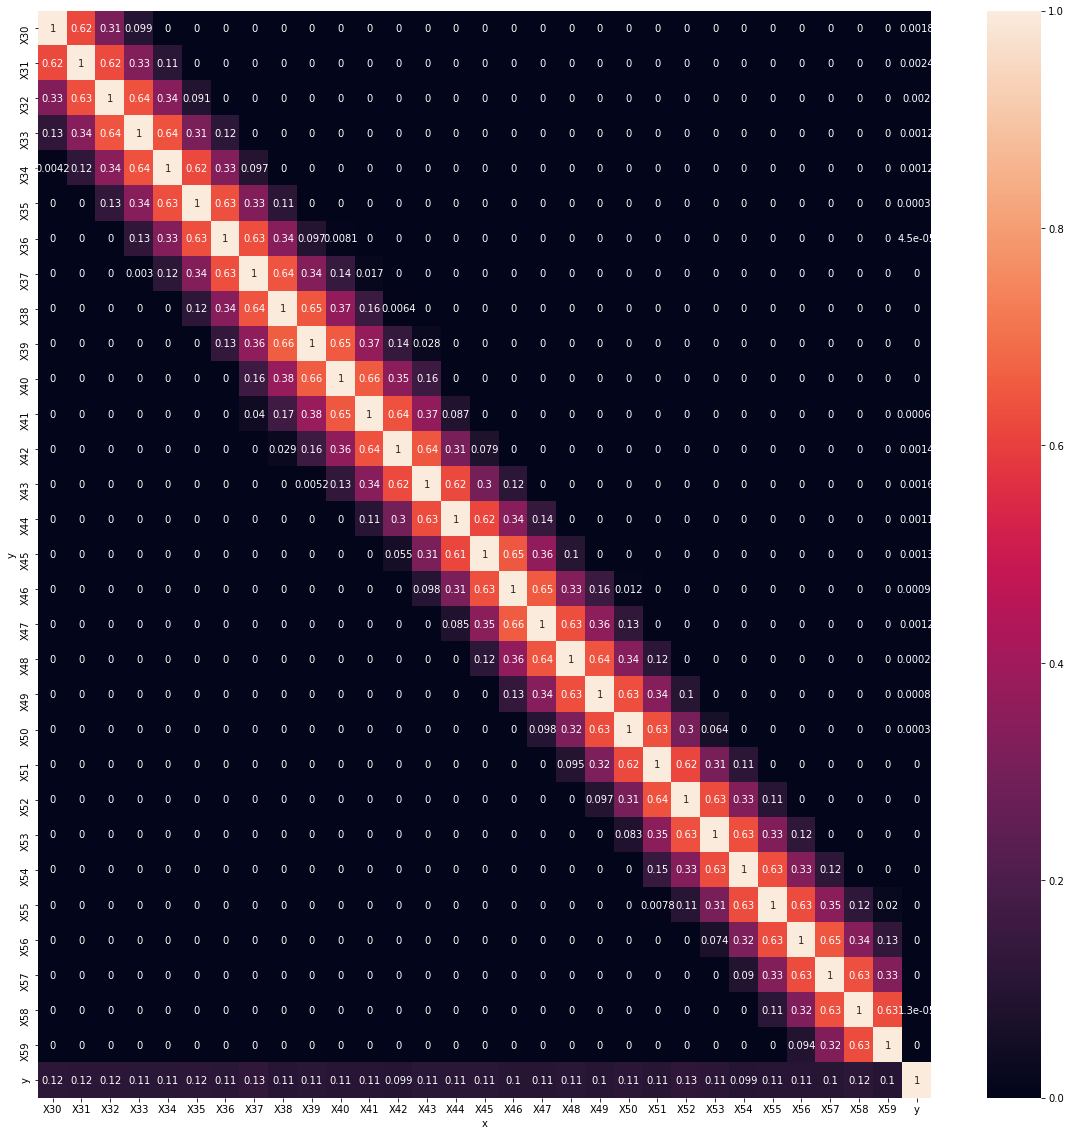

In [20]:
figure(figsize=(20,20))



matrix_df = pps.matrix(df_2).pivot(columns='x', index='y',  values='ppscore')

sns.heatmap(matrix_df, annot=True)

In [21]:
df_3 = df.iloc[:, 60:90]

df_3['y'] = df['y']

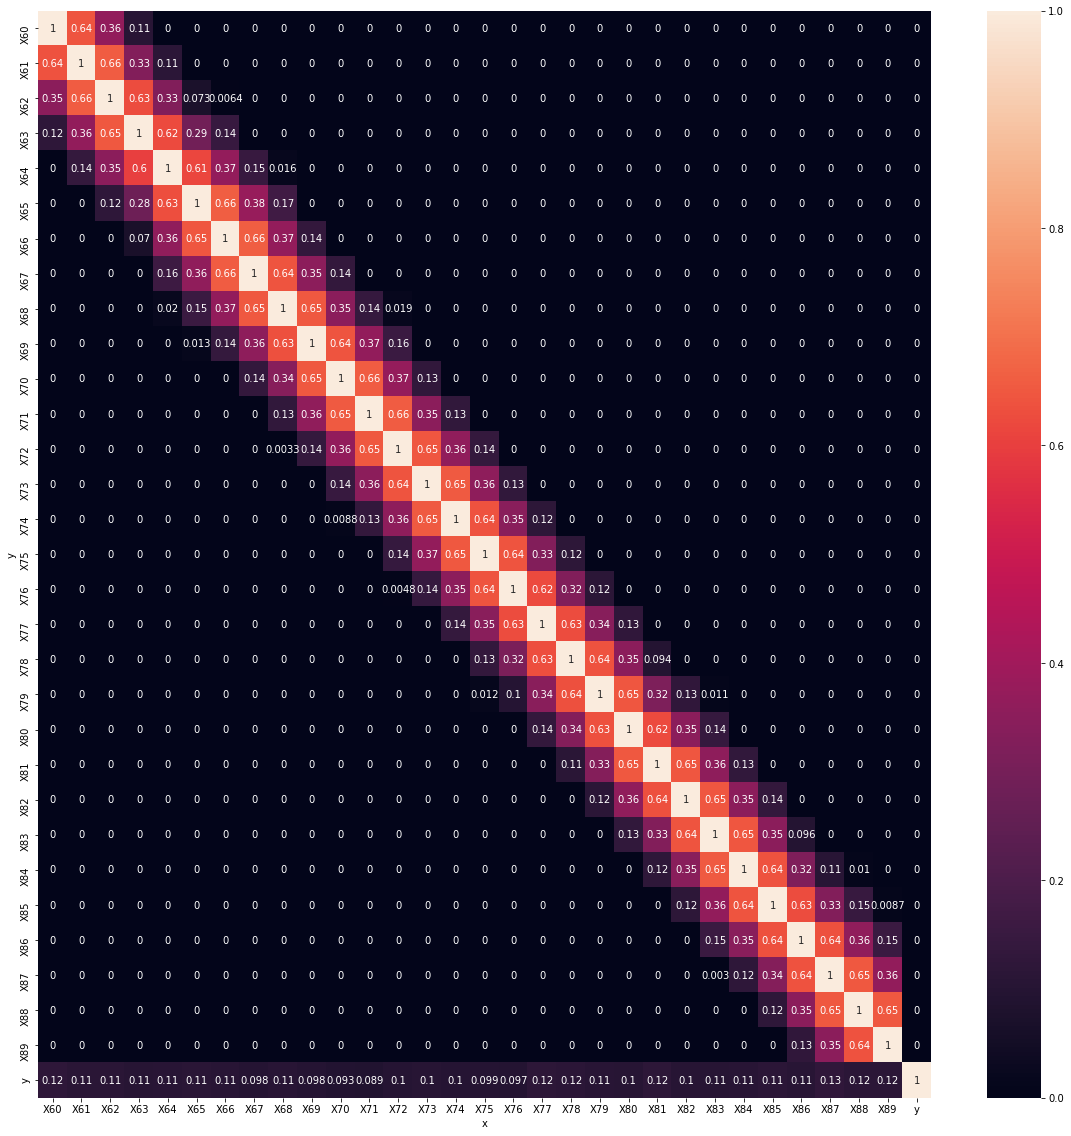

In [22]:
figure(figsize=(20,20))



matrix_df = pps.matrix(df_3).pivot(columns='x', index='y',  values='ppscore')

sns.heatmap(matrix_df, annot=True)

In [23]:
df_4 = df.iloc[:, 90:120]

df_4['y'] = df['y']


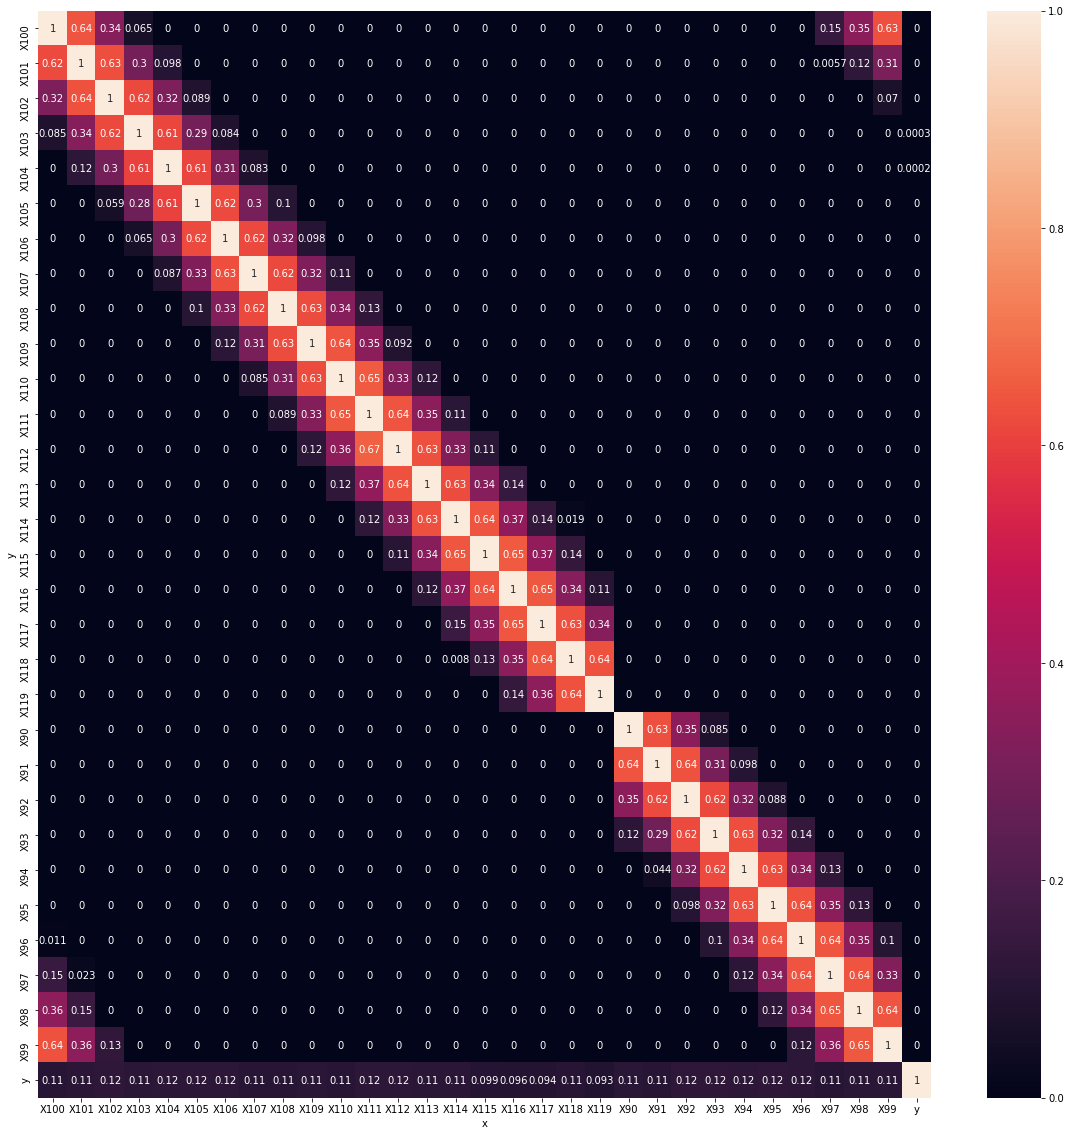

In [24]:
figure(figsize=(20,20))



matrix_df = pps.matrix(df_4).pivot(columns='x', index='y',  values='ppscore')

sns.heatmap(matrix_df, annot=True)

In [25]:
df_5 = df.iloc[:, 120:150]

df_5['y'] = df['y']

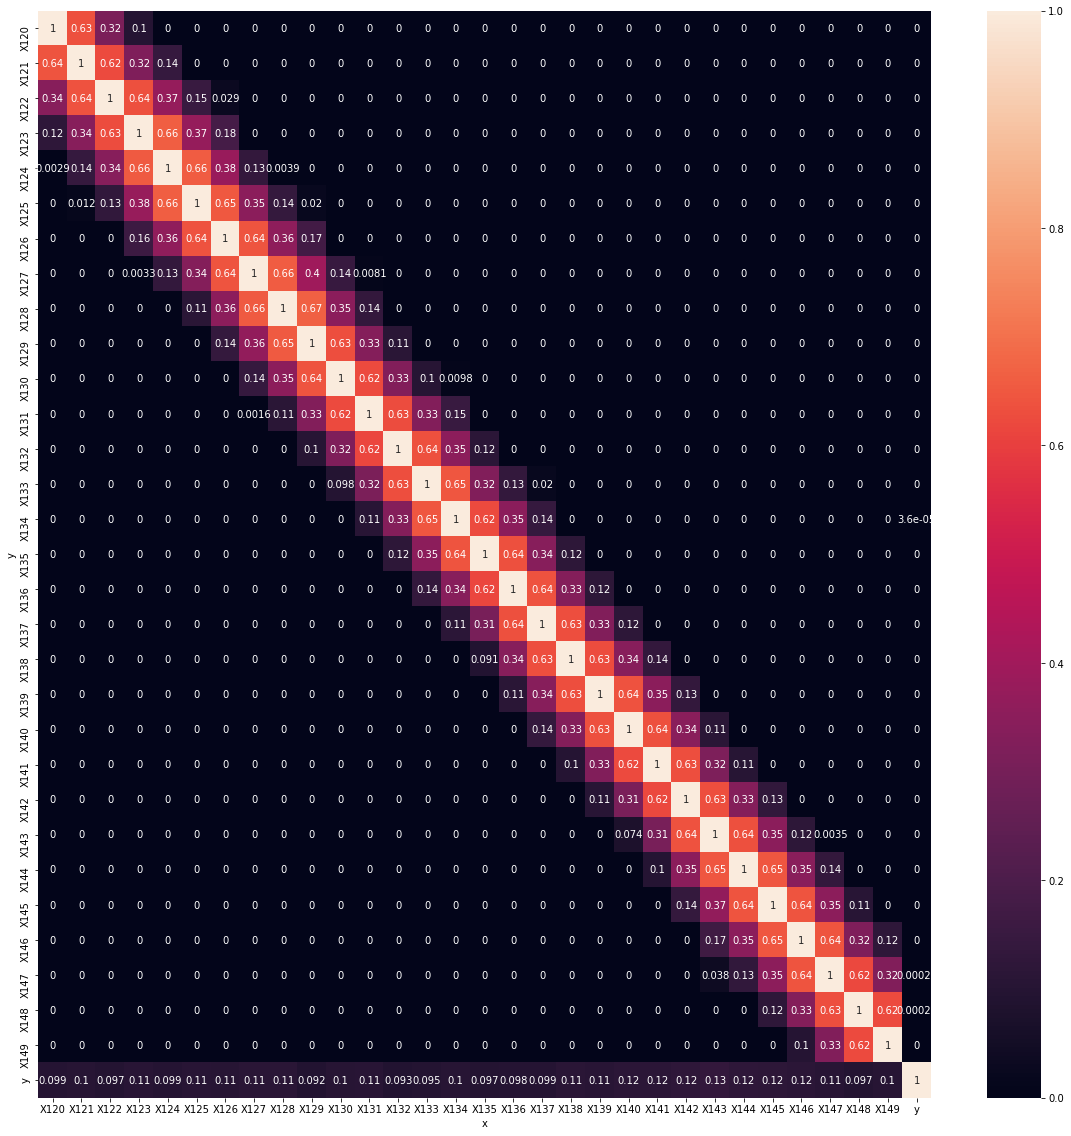

In [26]:
figure(figsize=(20,20))



matrix_df = pps.matrix(df_5).pivot(columns='x', index='y',  values='ppscore')

sns.heatmap(matrix_df, annot=True)

In [29]:
df_6 = df.iloc[:, 150:181]

df_6['y'] = df['y']

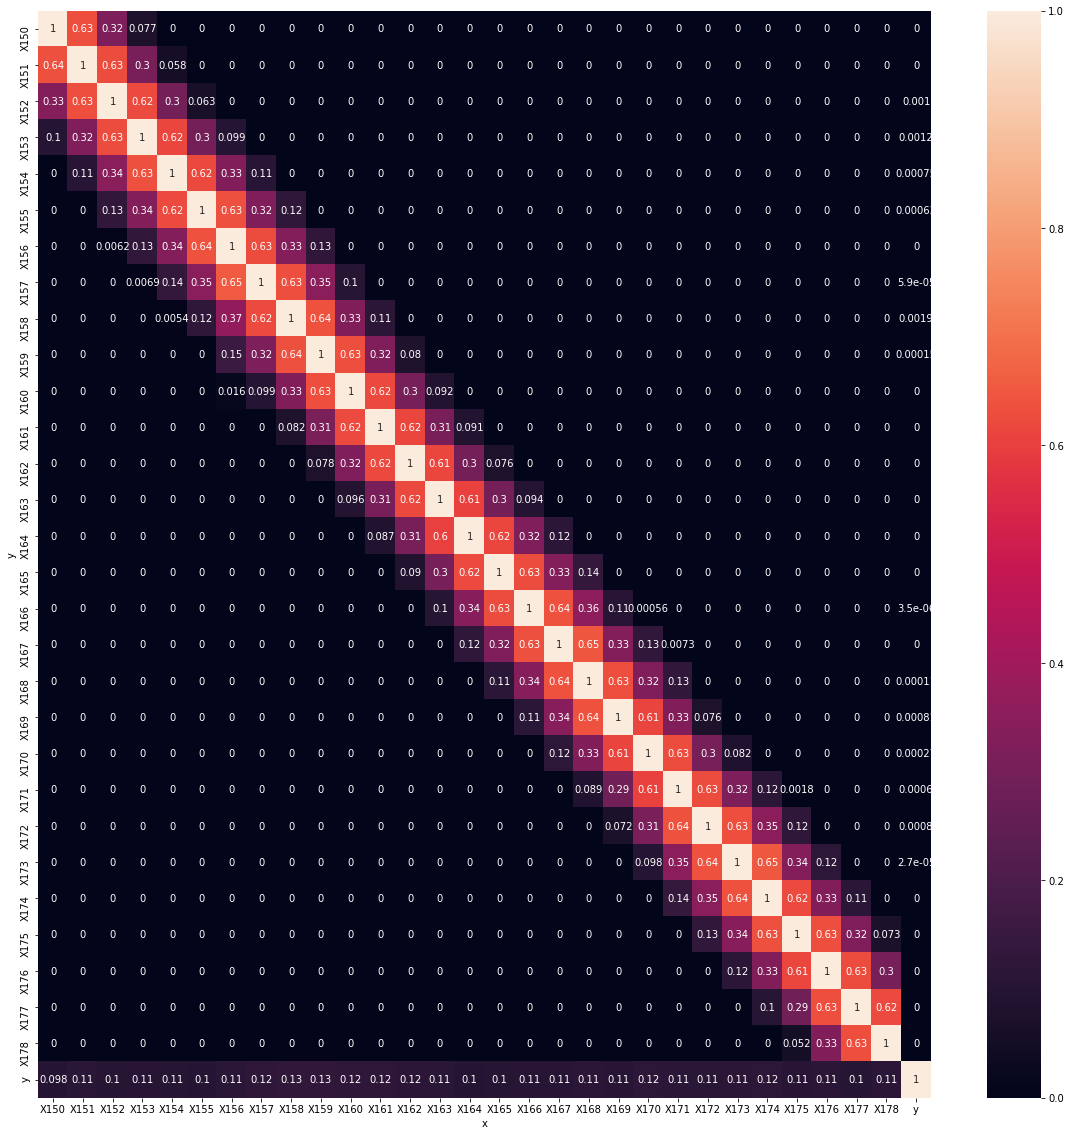

In [30]:
figure(figsize=(20,20))



matrix_df = pps.matrix(df_6).pivot(columns='x', index='y',  values='ppscore')

sns.heatmap(matrix_df, annot=True)

In [ ]:
# SELECT VARIABLES WHO ARE CORRELATED 0.12 AND 0.13 SINCE THOSE ARE HIGHER SCORES

# X1, X12, X13, X14, X15, X17, X2, X24, X26, X28, X29, X4, X8, X30, X31, X32, X35, X37, X52, X58, X60, X77, X78, X81, 

# X87, X88, X89, X102, X104, X105, X106, X111, X112, X92, X93, X94, X95, X96, X140, X141, X142, X143, X144, X145, X146

# X157, X158, X159, X160, X161, X162, X170, X174